## Shrey Kshatriya 10451146

# 1st Part
### 1. Include a brief description of the stock under study and possible factors that may affect its performance
The stock under the study is that of UnitedHealth group or UNH. UnitedHealth Group Incorporated operates as a diversified health care company in the United States. It operates through four segments: UnitedHealthcare, OptumHealth, OptumInsight, and OptumRx.
UnitedHealth Group's stock was trading at Dollar 277.78 on March 11th, 2020 when COVID-19 reached pandemic status according to the World Health Organization (WHO). Since then, UNH stock has increased by 26.0 percent to  Dollar 349.89. UnitedHealth Group has performed better as compared to other companies during the pandemic period. 
From 29th October 2020, UNH stock prices had dropped down to Dollar 303.68 and then experienced a massive spike in stock prices from 29th October to 4th November when the price was Dollar 354.56. 
On 11th November 2020, UNH reached a peak of Dollar 356.82 and has the current price of Dollar 349.89.

These are the following factors I understood to affect the performace of the stock
1. Trust and Loyalty of Inverstors
2. Consistent Top-Line Growth
3. Healthy Balance Sheet
4. Regular Share Buybacks and Dividend Payment
5. Favorable Cash Flows

[Reference : yahoo finance]

### 2. What precisely is the forecasting problem? How do you plan to calculate it? What is the target variable in your machine learning algorithm?
The prediction problem is to forecast the price direction of the given stock (UNH). I have to build a forecasting model of UNH's next day return trend using the years 2014-2018(train) and 2019(test). We can do so by using various machine learning algorithms, training and testing our model and then predict/forecast the direction of our value using a target variable.
I would be making this a classification problem by introducing a direction variable. This would be our target variable. This variable is derived from RET values.
Since it is dervied from RET, it would help us in making predictions for the stock return.

### 3. Which three forecasting machine learning algorithms do you think are appropriate for this problem domain and why? How do you plan to select the best algorithm? Justify your answer.
The 3 algorithms that I feel are appropriate for this problem domain are Logistic Regression, Support Vector Classification and Random Forest Classification.
Logistic Regression is one the most famous algorithms, it is appropriate when the values to be predicted are binary. Since we are using direction (which contains +1 and -1), it is is good machine learning algorithm to use. 

We use Support Vector Classification as it has the flexibility to define the amount of error acceptable in our model and can appropriately fit the data. It also transforms our data and can find optimal boundires between the outputs.

Lastly we use Random Forest Classification as it performs classification using multiple decision trees and helps in determining the output as compared to using a single decision tree. It is more accurate and due to bagging it has low prediction error.

We select the best paramenter using the cross validation score for each of the algorithm. 

### 4. What features would you use? You do not have to use all the variables included in the dataset, and you could also use additional variables. Would you modify or correct your data in any way? If you plan to introduce changes to any variable, you must be very specific and tell what variable(s) will change and how.
The features that we have used are as follows:

alpha, b_mkt, b_smb, b_hml, ivol, tvol, volatility and risk free rate

All the features have not been used as it does not contribute to the performance of the model. I will add additional features such as Volatility, risk free rate and also would be adding direction which would be our target variable. 
I would be adding risk free rate as it will capture the fluctuations of the market more precisely and any returns that we would have would be above the risk free rate. I would also add volatility of the market as it optimizes the idiosyncratic value of the Fama French Model. I am also adding direction as discussed above, it would be based on the return value from the given dataset. If todays return value is greater than the return value of yesterday, '1' would be assigned, or else '-1' would be assigned. I am not using 1 and 0 as it might have the chance of being counted as a null value.

I am not including ret and exret values as direction is calculated from ret, hence having that in our features would not make sense. Exret is not being added as the value of ret depends on exret and direction depends on ret. Hence, I also not including exret.

No existing variables are being changed or modified here. Only 2 variables/features are being added and 1 target is being added.

### 5. How will you calibrate your model and evaluate whether your model has captured any generalizable knowledge? Explain your method, and justify the metric(s) that you propose to employ.
We will calibrate our model using GridSearchCV to check whether or not out model has captured any knowledge are being calibrated. After performing calibaration, cross validation sccores again, if scores have increased, then we can say that our model is successfully calibarated and has captured generalizable knowledge. We us GridSearchCV as it is a good way to calibrate out model as it helps us to loop through, predefined parameters and select the best parameters from it. 
### 6. Compare two graphs that you could use to evaluate the different algorithms' performance and explain how they can help evaluate your models and select the best method. Select one graph and justify your answer.
I would be using ROC curve to compare two models which are logistic regressiona and random forest. ROC will help us in determining the better algorithm. The basis or ROC curve are that, the farther on the curve is from the 45 degree line and more towards to the top left corner of the graph, the better our model. Hence when I would plot ROC, I would consider the curve of the plotted curve. I will also plot lift curves that would indicate the part of data that would give us values that are positive/success generated by our model.
I will justify which model I will select in the comments below ROC curve.


### 7. How can you rank the features' importance?
Random Forest Regression has a feature of ranking the most important features as it uses multiple decision trees as mentioned above. We can use random forest regressor's feature_importance_parameters to rank the important features.

### 8. Once you put your system in production, would you leave it to work alone, or what else can you do?
Even after the system is put into production, we would have to monitor our model as we can improve our model by choosing factors that are not available in the dataset. Since, the stocks also depend on a random event that could happen such as a pandemic that happened, we can also introduce a variable which accounts for this. Hence, there is scope to improve the model and make it even more accurate.



# 2nd Part

### Preprocessing

In [200]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import pandas as pd
import matplotlib.pyplot as mpl
from sklearn.preprocessing import scale
from matplotlib import style
import matplotlib.dates as mdates
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np

import matplotlib.pylab as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 15, 12

C:\Users\shrey\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  # Remove the CWD from sys.path while we load stuff.


In [147]:
#importing dataset
df = pd.read_excel(r'UNH_dataset.xlsx')
df.head()

,PERMNO,DATE,n,RET,alpha,b_mkt,b_smb,b_hml,ivol,tvol,R2,exret,TICKER
0,92655,20191231,252,0.000442,0.0000,0.6497,0.1444,-0.2595,0.014782,0.015919,0.137713,-0.001100,UNH
1,92655,20191230,252,-0.007163,0.0001,0.6521,0.1428,-0.2610,0.014785,0.015933,0.138979,-0.002212,UNH
2,92655,20191227,252,0.001082,0.0001,0.6510,0.1449,-0.2595,0.014784,0.015925,0.138175,0.002203,UNH
3,92655,20191224,252,-0.001864,0.0001,0.6778,0.1280,-0.2632,0.014797,0.016172,0.162836,-0.002459,UNH
4,92655,20191223,252,0.008544,0.0001,0.6910,0.1094,-0.2556,0.014804,0.016241,0.169076,0.006803,UNH


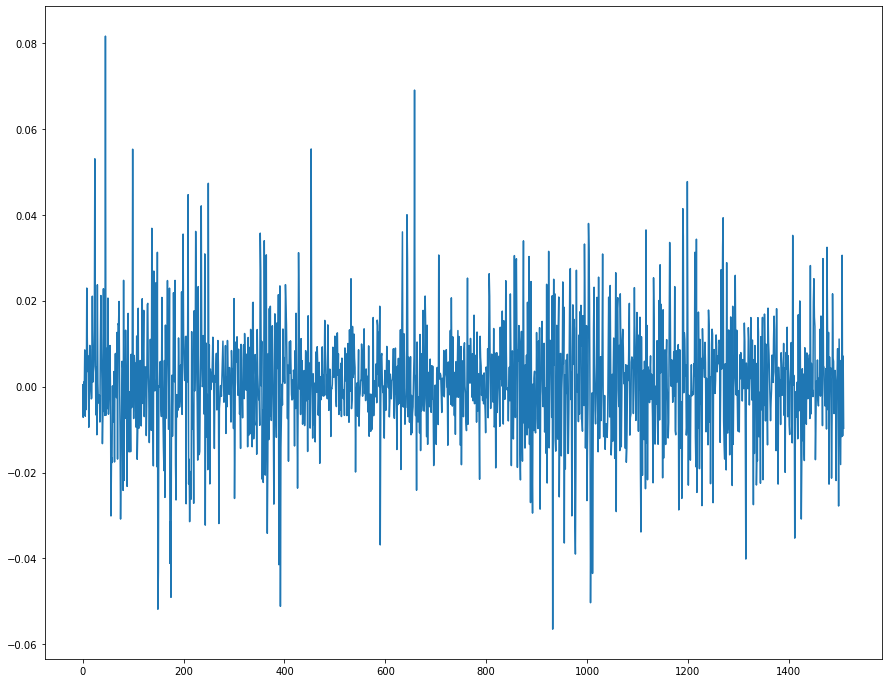

In [201]:
#checking the plot for 'RET'
df['RET'].plot.line()

In [149]:
#adding volatility and risk free rate
df["mkt_vol"] = df["R2"] * df["ivol"]
df["rfr"] = df["RET"]-df["exret"]

In [150]:
#dropping rows that are not needed
dt = df.drop(['TICKER', 'PERMNO', 'n', 'exret'], axis = 1)
dt.head() #we have kept date as we need to split the data into training and testing

,DATE,RET,alpha,b_mkt,b_smb,b_hml,ivol,tvol,R2,mkt_vol,rfr
0,20191231,0.000442,0.0000,0.6497,0.1444,-0.2595,0.014782,0.015919,0.137713,0.002036,0.001542
1,20191230,-0.007163,0.0001,0.6521,0.1428,-0.2610,0.014785,0.015933,0.138979,0.002055,-0.004951
2,20191227,0.001082,0.0001,0.6510,0.1449,-0.2595,0.014784,0.015925,0.138175,0.002043,-0.001121
3,20191224,-0.001864,0.0001,0.6778,0.1280,-0.2632,0.014797,0.016172,0.162836,0.002409,0.000595
4,20191223,0.008544,0.0001,0.6910,0.1094,-0.2556,0.014804,0.016241,0.169076,0.002503,0.001741


In [151]:
#sorting the date in ascending order
dt = dt.sort_values('DATE')
dt

,DATE,RET,alpha,b_mkt,b_smb,b_hml,ivol,tvol,R2,mkt_vol,rfr
1509,20140102,-0.009695,0.0005,0.8524,-0.3897,0.2838,0.011673,0.013097,0.205636,0.002400,-0.005652
1508,20140103,0.007107,0.0007,0.8363,-0.3622,0.3016,0.011318,0.012743,0.211184,0.002390,-0.001073
1507,20140106,-0.011451,0.0007,0.8400,-0.3452,0.2929,0.011341,0.012770,0.211226,0.002396,0.000102
1506,20140107,0.030577,0.0008,0.8541,-0.3293,0.2470,0.011462,0.012900,0.210434,0.002412,0.003223
1505,20140108,-0.011632,0.0008,0.8500,-0.3262,0.2548,0.011466,0.012893,0.209100,0.002398,0.000037
...,...,...,...,...,...,...,...,...,...,...,...
3,20191224,-0.001864,0.0001,0.6778,0.1280,-0.2632,0.014797,0.016172,0.162836,0.002409,0.000595
1492,20191226,0.003769,0.0001,0.6547,0.1380,-0.2591,0.014788,0.015937,0.138976,0.002055,0.002672
2,20191227,0.001082,0.0001,0.6510,0.1449,-0.2595,0.014784,0.015925,0.138175,0.002043,-0.001121
1,20191230,-0.007163,0.0001,0.6521,0.1428,-0.2610,0.014785,0.015933,0.138979,0.002055,-0.004951


In [152]:
#creating another variable direction froom RET which would have the the direction of the model
direction = []
for index, row in dt.iterrows():
    if index == 0: direction.append(1)
        
    elif dt['RET'][index] - dt['RET'][index-1]>=0:
        direction.append(1)
        
    else:
        direction.append(-1)
    
dt['direction'] = direction
dt.head()

,DATE,RET,alpha,b_mkt,b_smb,b_hml,ivol,tvol,R2,mkt_vol,rfr,direction
1509,20140102,-0.009695,0.0005,0.8524,-0.3897,0.2838,0.011673,0.013097,0.205636,0.002400,-0.005652,-1
1508,20140103,0.007107,0.0007,0.8363,-0.3622,0.3016,0.011318,0.012743,0.211184,0.002390,-0.001073,1
1507,20140106,-0.011451,0.0007,0.8400,-0.3452,0.2929,0.011341,0.012770,0.211226,0.002396,0.000102,-1
1506,20140107,0.030577,0.0008,0.8541,-0.3293,0.2470,0.011462,0.012900,0.210434,0.002412,0.003223,1
1505,20140108,-0.011632,0.0008,0.8500,-0.3262,0.2548,0.011466,0.012893,0.209100,0.002398,0.000037,-1


In [153]:
#date is not given in proper order, so we index it in proper order for plotting graphs and using in our classification models
formatted_date = []
for cell in dt['DATE']:
    cell = datetime.strptime(str(cell), '%Y%m%d')
    formatted_date.append(cell)
    
dt["formatted_date"] = formatted_date
dt.drop('DATE', inplace=True, axis=1)
dt.rename(columns={'formatted_date': 'DATE'}, inplace=True)

dt["DATE_INDEX"] = pd.to_datetime(dt["DATE"])
dt = dt.set_index("DATE_INDEX")
dt.head()

,RET,alpha,b_mkt,b_smb,b_hml,ivol,tvol,R2,mkt_vol,rfr,direction,DATE
DATE_INDEX,,,,,,,,,,,,
2014-01-02,-0.009695,0.0005,0.8524,-0.3897,0.2838,0.011673,0.013097,0.205636,0.002400,-0.005652,-1,2014-01-02
2014-01-03,0.007107,0.0007,0.8363,-0.3622,0.3016,0.011318,0.012743,0.211184,0.002390,-0.001073,1,2014-01-03
2014-01-06,-0.011451,0.0007,0.8400,-0.3452,0.2929,0.011341,0.012770,0.211226,0.002396,0.000102,-1,2014-01-06
2014-01-07,0.030577,0.0008,0.8541,-0.3293,0.2470,0.011462,0.012900,0.210434,0.002412,0.003223,1,2014-01-07
2014-01-08,-0.011632,0.0008,0.8500,-0.3262,0.2548,0.011466,0.012893,0.209100,0.002398,0.000037,-1,2014-01-08


In [154]:
#coverting direction variable from object to float
dt["direction"] = dt.direction.astype(float)

In [155]:
#splitting the data into training and testing
#training has dates ranging from 2014 to 2018 and test has dates of only 2019
train = pd.DataFrame(columns=dt.columns)
trainidx = 0
test = pd.DataFrame(columns=dt.columns)
testidx = 0
for index, row in dt.iterrows():
    if(str(row['DATE'])[:4]=='2019'):
        #print('hi')
        test.loc[testidx] = row
        testidx+=1

    else:
        train.loc[trainidx] = row
        trainidx+=1

In [156]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1258 entries, 0 to 1257
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   RET        1258 non-null   float64       
 1   alpha      1258 non-null   float64       
 2   b_mkt      1258 non-null   float64       
 3   b_smb      1258 non-null   float64       
 4   b_hml      1258 non-null   float64       
 5   ivol       1258 non-null   float64       
 6   tvol       1258 non-null   float64       
 7   R2         1258 non-null   float64       
 8   mkt_vol    1258 non-null   float64       
 9   rfr        1258 non-null   float64       
 10  direction  1258 non-null   float64       
 11  DATE       1258 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(11)
memory usage: 127.8 KB


In [157]:
X_train_features=train.iloc[:,np.r_[1,2,3,4,5,6,8,9]] #selecting the values that we need for our model
X_train = X_train_features.values #returns a list of values for the features
y_train_target = train.iloc[:,10] #selecting the target variable
y_train = y_train_target.values

#similar steps for the test data as well
X_test_features = test.iloc[:, np.r_[1,2,3,4,5,6,8,9]]
X_test = X_test_features.values
y_test_target = test.iloc[: ,10]
y_test= y_test_target.values
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1258 entries, 0 to 1257
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   RET        1258 non-null   float64       
 1   alpha      1258 non-null   float64       
 2   b_mkt      1258 non-null   float64       
 3   b_smb      1258 non-null   float64       
 4   b_hml      1258 non-null   float64       
 5   ivol       1258 non-null   float64       
 6   tvol       1258 non-null   float64       
 7   R2         1258 non-null   float64       
 8   mkt_vol    1258 non-null   float64       
 9   rfr        1258 non-null   float64       
 10  direction  1258 non-null   float64       
 11  DATE       1258 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(11)
memory usage: 127.8 KB


### Model Choosing from Logistic Regression, Support Vector and Random Forest

In [158]:
#performing Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

#fitting logistic regression
clf = LogisticRegression(penalty = 'l2').fit(X_train, y_train)
lr_pred = clf.predict(X_test)  #prediction for our fitted model

In [159]:
#computing cross validation score for logistic regression model
log_scores = cross_val_score(clf, X_train, y_train, scoring="accuracy", cv=10)
print ("Cross Validated Accuracy: %0.3f +/- %0.3f" % (log_scores.mean(), log_scores.std()))

Cross Validated Accuracy: 0.521 +/- 0.045


In [84]:
#performing Support Vector Classification
from sklearn.svm import LinearSVC

#fitting the model
svm_fit = LinearSVC(penalty='l2')
svm_mod = svm_fit.fit(X_train, y_train) #predictions for our fitted model

In [160]:
#computing cross validation scores for Support Vector
svm_scores = cross_val_score(svm_mod, X_train, y_train, scoring="accuracy", cv=5)
print ("Cross Validated Accuracy: %0.3f +/- %0.3f" % (svm_scores.mean(), svm_scores.std()))

Cross Validated Accuracy: 0.526 +/- 0.025


In [117]:
#performing Random Forest Classifiaction
from sklearn.ensemble import RandomForestClassifier
regr = RandomForestClassifier()
rf = regr.fit(X_train, y_train) #fitting the model
pred_rf = rf.predict(X_test) #predicting the 

In [90]:
#computing cross validation score for Random Forest
rf_scores = cross_val_score(rf, X_train, y_train, scoring="accuracy", cv=5)
print ("Cross Validated Accuracy: %0.3f +/- %0.3f" % (rf_scores.mean(), rf_scores.std()))

Cross Validated Accuracy: 0.548 +/- 0.041


We notice above that the best Algorithm out of the three is Random Forest. Hence, we would use random forest for our predictions and use gridsearchcv and randomizedsearchcv for calibrating our model.

### Calibration

In [96]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [10, 20, 30, 40, 50, 60,70, 80, 90, 100, 110,None],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [200, 400, 1000, 1600, 1800]
}
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf_reg, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [97]:
#fitting the model
grid_search.fit(X_train, y_train)
grid_search.best_params_ #finding the best parameters

Fitting 3 folds for each of 1080 candidates, totalling 3240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   16.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed: 14.1min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed: 18.9min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed: 24.3min
[Parallel(n_jobs=-1)]: Done 3240 out of 3240 | elapsed: 30.5min finished


{'bootstrap': True,
 'max_depth': 30,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 400}

In [133]:
#running random forest regression with best different parameter
regr_new = RandomForestClassifier(bootstrap= True,
 max_depth= 30,
 max_features= 4,
 min_samples_leaf= 4,
 min_samples_split= 2,
 n_estimators= 400)
rf_new = regr_new.fit(X_train, y_train)
pred_rf_new = rf_new.predict(X_test)

rf_new_scores = cross_val_score(rf_new, X_train, y_train, scoring="accuracy", cv=5)
print ("Cross Validated Accuracy: %0.3f +/- %0.3f" % (rf_new_scores.mean(), rf_new_scores.std()))

Cross Validated Accuracy: 0.582 +/- 0.041


Running Random Forest with best parameter, we observe that there is improvement in the cross validation score of the model.
We can say that the model is calibrated as the model has improved has can also say that it has captured generalizable knowledge.

### Plotting and comparing graphs
#### 1. Logistic Regression

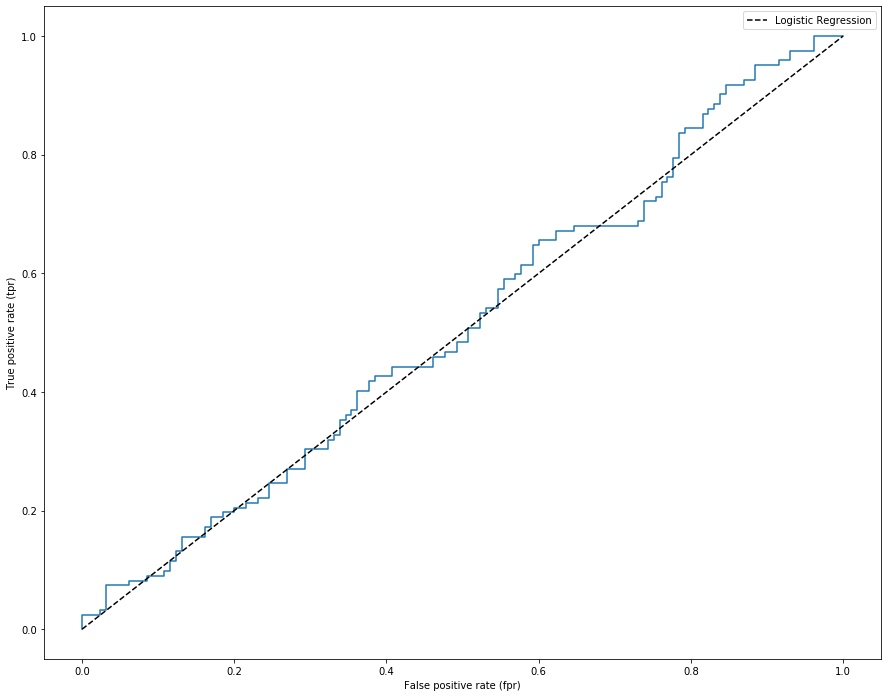

In [202]:
#Plotting ROC curve for logistic Regression
from sklearn import metrics
import numpy as np
y_test_probability_1 = clf.predict_proba(X_test)[:, 1]

    # Use the metrics.roc_curve function to get the true positive rate (tpr) and false positive rate (fpr)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_probability_1)
    
    # Get the area under the curve (AUC)
auc = np.mean(cross_val_score(clf, X_train, y_train, scoring="roc_auc", cv=5))

    # Plot the ROC curve

plt.plot(fpr, tpr)
    
plt.xlabel("False positive rate (fpr)")
plt.ylabel("True positive rate (tpr)")
plt.plot([0,1], [0,1], 'k--', label="Logistic Regression")
plt.legend(loc='best')

As explained in the first part, we can see here that Linear Regression is closer to the 45 degree line.

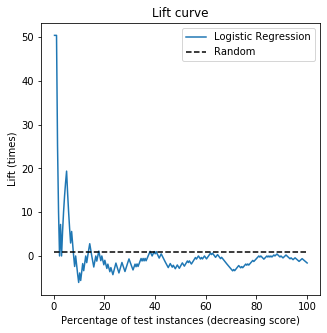

In [220]:
#lift curve
plt.rcParams['figure.figsize'] = 5, 5
def build_cumulative_curve(model, scale=100):
     # Fit model
    model.fit(X_train, y_train)

    # Get the probability of Y_test records being = 1
    Y_test_probability_1 = model.predict_proba(X_test)[:, 1]

    # Sort these probabilities and the true value in descending order of probability
    order = np.argsort(Y_test_probability_1)[::-1]
    Y_test_probability_1_sorted = Y_test_probability_1[order]
    Y_test_sorted = np.array(y_test)[order]
    
    x_cumulative = np.arange(len(Y_test_probability_1_sorted)) + 1
    y_cumulative = np.cumsum(Y_test_sorted)

# Rescale
    x_cumulative = np.array(x_cumulative)/float(x_cumulative.max()) * scale
    y_cumulative = np.array(y_cumulative)/float(y_cumulative.max()) * scale
    
    return x_cumulative, y_cumulative

def plot_cumulative_curve(models):
    # Plot curve for each model
    for key in models:
        x_cumulative, y_cumulative = build_cumulative_curve(models[key])
        plt.plot(x_cumulative, y_cumulative, label=key)
    # Plot other details
    plt.plot([0,100], [0,100], 'k--', label="Random")
    plt.xlabel("Percentage of test instances targeted (decreasing score)")
    plt.ylabel("Percentage of positives targeted")
    plt.title("Cumulative response curve")
    plt.legend()

models = {'Logistic Regression' : LogisticRegression()}

def plot_lift_curve(models):
    # Plot curve for each model
    for key in models:
        x_cumulative, y_cumulative = build_cumulative_curve(models[key])
        plt.plot(x_cumulative, y_cumulative/x_cumulative, label=key)
    # Plot other details
    plt.plot([0,100], [1,1], 'k--', label="Random")
    plt.xlabel("Percentage of test instances (decreasing score)")
    plt.ylabel("Lift (times)")
    plt.title("Lift curve")
    plt.legend()

plot_lift_curve(models)

#### SVM

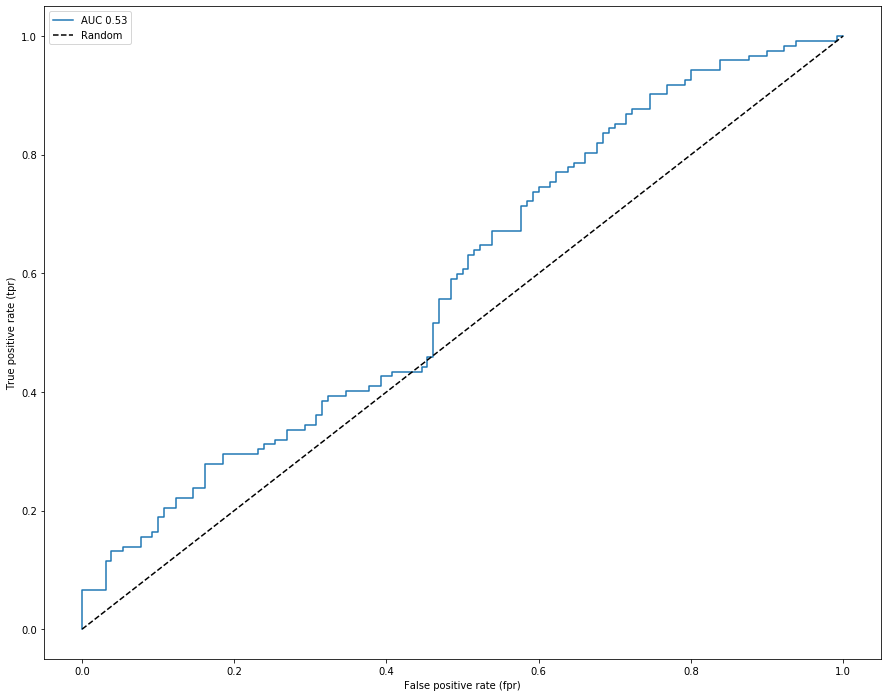

In [203]:
from sklearn.calibration import CalibratedClassifierCV

clf_svm = CalibratedClassifierCV(svm_mod) 
clf_svm = clf_svm.fit(X_train, y_train)
# Get the probability of Y_test records being = 1
Y_test_probability_1 = clf_svm.predict_proba(X_test)[:, 1]

# Use the metrics.roc_curve function to get the true positive rate (tpr) and false positive rate (fpr)
fpr, tpr, thresholds = metrics.roc_curve(y_test, Y_test_probability_1)
    
# Get the area under the curve (AUC)
auc = svm_scores.mean()

# Plot the ROC curve
plt.plot(fpr, tpr, label="AUC " + str(round(auc, 2)))
plt.xlabel("False positive rate (fpr)")
plt.ylabel("True positive rate (tpr)")
plt.plot([0,1], [0,1], 'k--', label="Random")
plt.legend(loc='best')

We can see that the above graph is better than Logistic Regression however, it is still touching the 45 degree line.

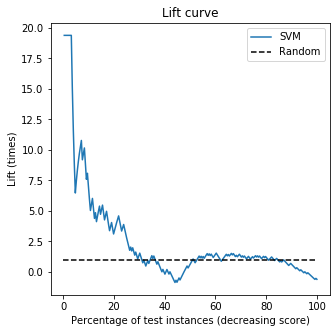

In [221]:
#lift curve
plt.rcParams['figure.figsize'] = 5, 5
def build_cumulative_curve(model, scale=100):
     # Fit model
    model.fit(X_train, y_train)

    # Get the probability of Y_test records being = 1
    Y_test_probability_1 = model.predict_proba(X_test)[:, 1]

    # Sort these probabilities and the true value in descending order of probability
    order = np.argsort(Y_test_probability_1)[::-1]
    Y_test_probability_1_sorted = Y_test_probability_1[order]
    Y_test_sorted = np.array(y_test)[order]
    
    x_cumulative = np.arange(len(Y_test_probability_1_sorted)) + 1
    y_cumulative = np.cumsum(Y_test_sorted)

# Rescale
    x_cumulative = np.array(x_cumulative)/float(x_cumulative.max()) * scale
    y_cumulative = np.array(y_cumulative)/float(y_cumulative.max()) * scale
    
    return x_cumulative, y_cumulative

def plot_cumulative_curve(models):
    # Plot curve for each model
    for key in models:
        x_cumulative, y_cumulative = build_cumulative_curve(models[key])
        plt.plot(x_cumulative, y_cumulative, label=key)
    # Plot other details
    plt.plot([0,100], [0,100], 'k--', label="Random")
    plt.xlabel("Percentage of test instances targeted (decreasing score)")
    plt.ylabel("Percentage of positives targeted")
    plt.title("Cumulative response curve")
    plt.legend()

models = {"SVM": CalibratedClassifierCV()}

def plot_lift_curve(models):
    # Plot curve for each model
    for key in models:
        x_cumulative, y_cumulative = build_cumulative_curve(models[key])
        plt.plot(x_cumulative, y_cumulative/x_cumulative, label=key)
    # Plot other details
    plt.plot([0,100], [1,1], 'k--', label="Random")
    plt.xlabel("Percentage of test instances (decreasing score)")
    plt.ylabel("Lift (times)")
    plt.title("Lift curve")
    plt.legend()

plot_lift_curve(models)

#### Random Forest

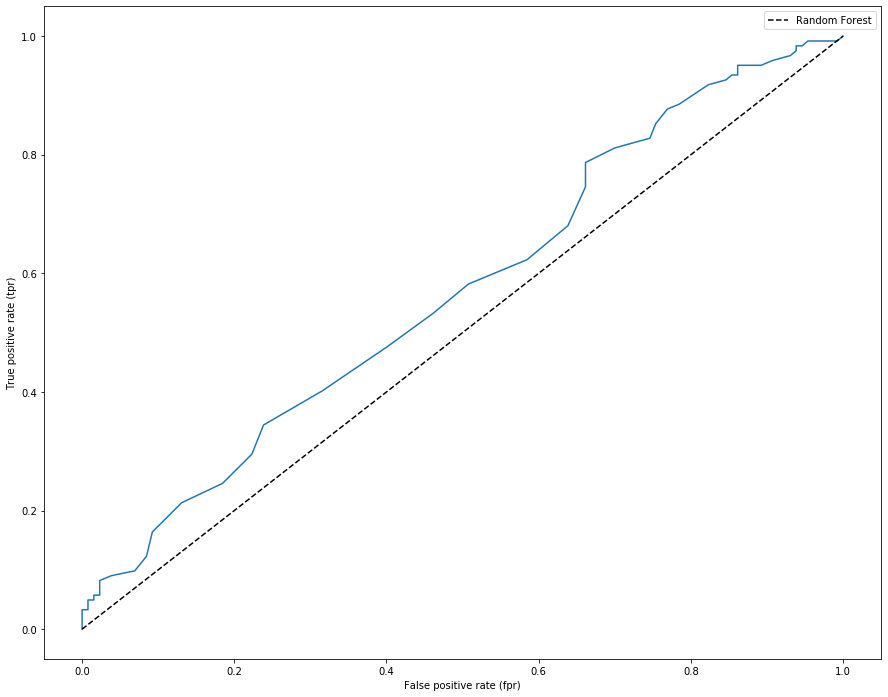

In [204]:
#ROC curve
from sklearn import metrics
import numpy as np
y_test_probability_1 = rf.predict_proba(X_test)[:, 1]

    # Use the metrics.roc_curve function to get the true positive rate (tpr) and false positive rate (fpr)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_probability_1)
    
    # Get the area under the curve (AUC)
auc = np.mean(cross_val_score(clf, X_train, y_train, scoring="roc_auc", cv=5))

    # Plot the ROC curve

plt.plot(fpr, tpr)
    
plt.xlabel("False positive rate (fpr)")
plt.ylabel("True positive rate (tpr)")
plt.plot([0,1], [0,1], 'k--', label="Random Forest")
plt.legend(loc='best')

We observe here that the curve is the best for Random Forest and has the best curve amongst the three. It is more close to top left of the plot and farther from the 45 degree line than other models.

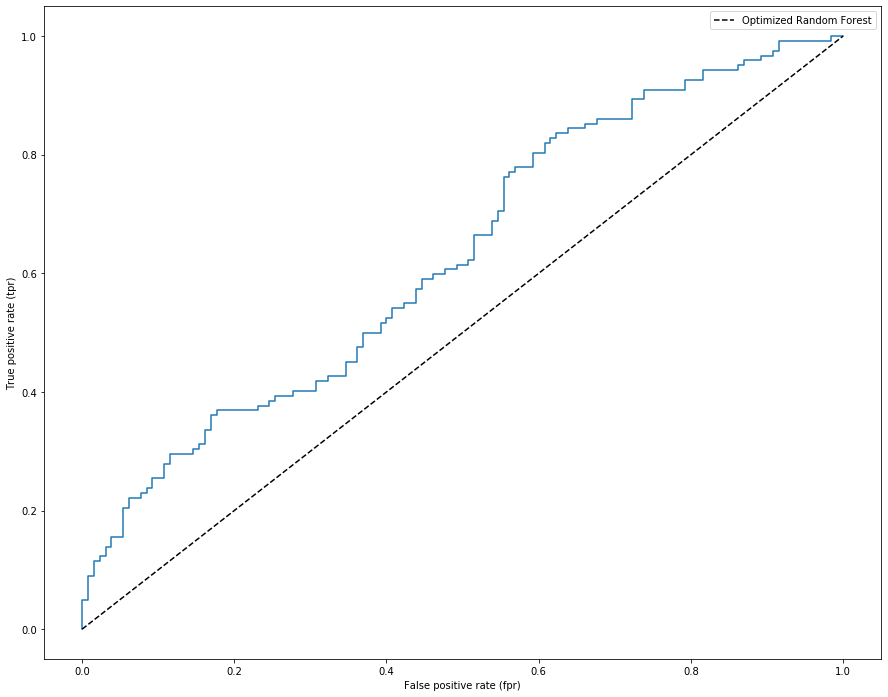

In [223]:
#ROC curve for optimized Random Forest
plt.rcParams['figure.figsize'] = 15, 12
from sklearn import metrics
import numpy as np
y_test_probability_1 = rf_new.predict_proba(X_test)[:, 1]

    # Use the metrics.roc_curve function to get the true positive rate (tpr) and false positive rate (fpr)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_probability_1)
    
    # Get the area under the curve (AUC)
auc = np.mean(cross_val_score(clf, X_train, y_train, scoring="roc_auc", cv=5))

    # Plot the ROC curve

plt.plot(fpr, tpr)
    
plt.xlabel("False positive rate (fpr)")
plt.ylabel("True positive rate (tpr)")
plt.plot([0,1], [0,1], 'k--', label="Optimized Random Forest")
plt.legend(loc='best')

We plot the calibrated Random Forest model here and we observe that it is even better than Random Forest.
Hence we can pick random forest as the best model.

In this way we can pick a model that is best for us using ROC curve.

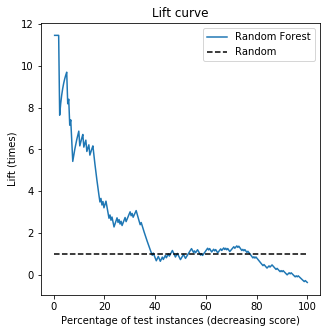

In [224]:
#lift curve
plt.rcParams['figure.figsize'] = 5, 5
def build_cumulative_curve(model, scale=100):
     # Fit model
    model.fit(X_train, y_train)

    # Get the probability of Y_test records being = 1
    Y_test_probability_1 = model.predict_proba(X_test)[:, 1]

    # Sort these probabilities and the true value in descending order of probability
    order = np.argsort(Y_test_probability_1)[::-1]
    Y_test_probability_1_sorted = Y_test_probability_1[order]
    Y_test_sorted = np.array(y_test)[order]
    
    x_cumulative = np.arange(len(Y_test_probability_1_sorted)) + 1
    y_cumulative = np.cumsum(Y_test_sorted)

# Rescale
    x_cumulative = np.array(x_cumulative)/float(x_cumulative.max()) * scale
    y_cumulative = np.array(y_cumulative)/float(y_cumulative.max()) * scale
    
    return x_cumulative, y_cumulative

def plot_cumulative_curve(models):
    # Plot curve for each model
    for key in models:
        x_cumulative, y_cumulative = build_cumulative_curve(models[key])
        plt.plot(x_cumulative, y_cumulative, label=key)
    # Plot other details
    plt.plot([0,100], [0,100], 'k--', label="Random")
    plt.xlabel("Percentage of test instances targeted (decreasing score)")
    plt.ylabel("Percentage of positives targeted")
    plt.title("Cumulative response curve")
    plt.legend()

models = {'Random Forest' : RandomForestClassifier(bootstrap= True,
 max_depth= 30,
 max_features= 4,
 min_samples_leaf= 4,
 min_samples_split= 2,
 n_estimators= 400)}

def plot_lift_curve(models):
    # Plot curve for each model
    for key in models:
        x_cumulative, y_cumulative = build_cumulative_curve(models[key])
        plt.plot(x_cumulative, y_cumulative/x_cumulative, label=key)
    # Plot other details
    plt.plot([0,100], [1,1], 'k--', label="Random")
    plt.xlabel("Percentage of test instances (decreasing score)")
    plt.ylabel("Lift (times)")
    plt.title("Lift curve")
    plt.legend()

plot_lift_curve(models)

### Feature ranking

In [209]:
#selecting the features that we have used in the model
features = np.array(['alpha', ' b_mkt', 'b_smb', 'b_hml', 'ivol', 'tvol', 'mkt_vol', 'rfr'])
imp_f = rf_new.feature_importances_ #selecting our best model
sorted_idx = np.argsort(imp_f)

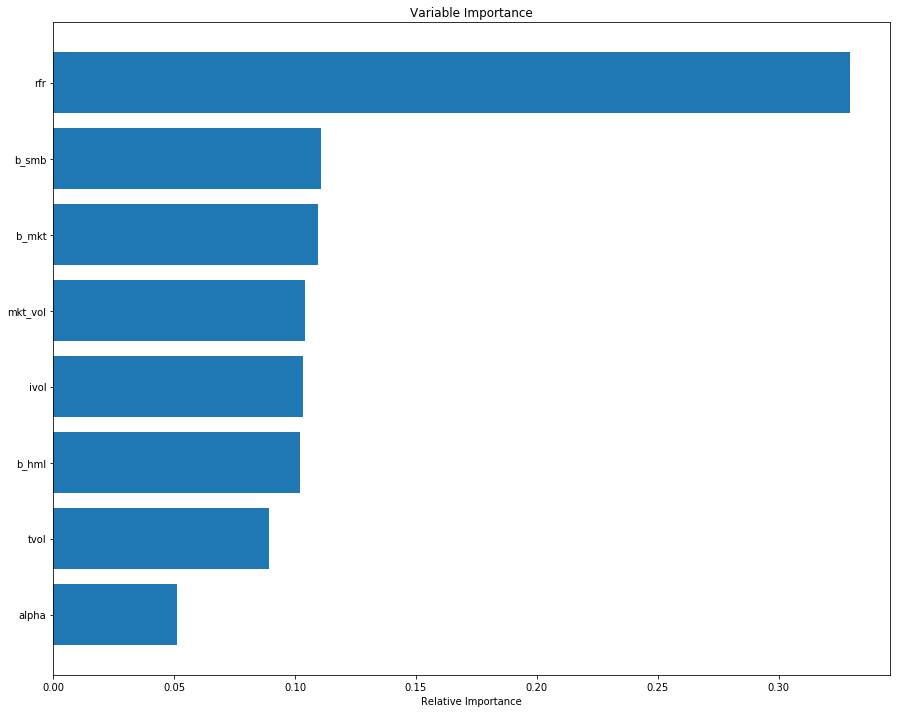

In [211]:
#plotting the important features that affect our model
import pylab as pl
padding = np.arange(len(features)) + 0.5
pl.barh(padding, imp_f[sorted_idx], align='center')
pl.yticks(padding, features[sorted_idx])
pl.xlabel("Relative Importance")
pl.title("Variable Importance")
pl.show()

From the graph above we can see that the features that are most important for our model are rfr whihch the risk free rate, b_smb which is beta small minus big and beta market.

### Forecasting whether to buy or sell stock

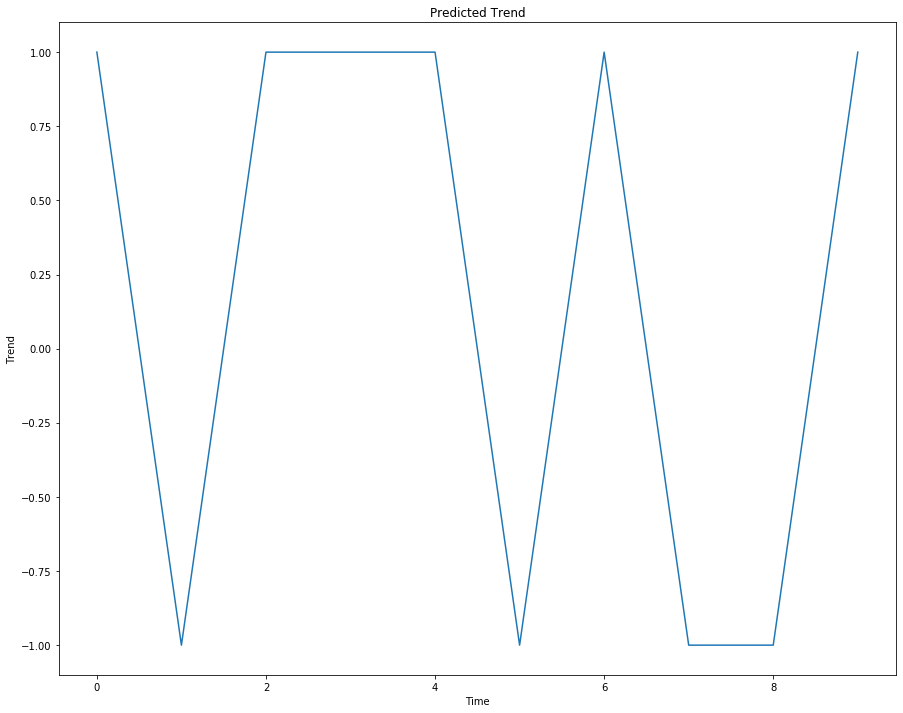

In [233]:
plt.rcParams['figure.figsize'] = 15, 12
plt.plot(pred_rf_new[:10]) #running the plot for last 365 days
plt.xlabel('Time')
plt.ylabel('Trend')
plt.title('Predicted Trend')
plt.show()

C:\Users\shrey\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\shrey\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\shrey\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


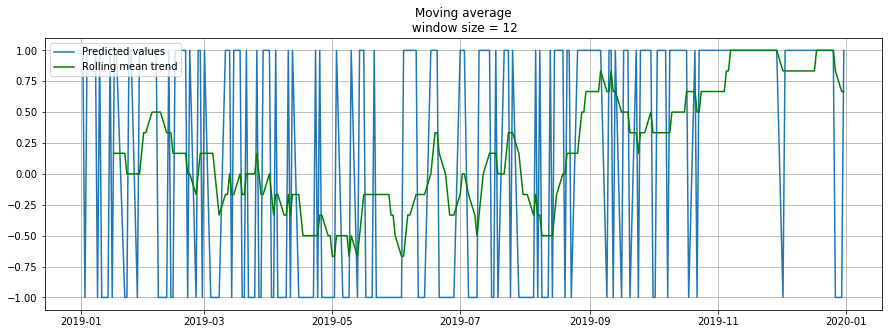

In [182]:
#plotting graph of predicted values with moving average values
window= 12
pred_rf_new = rf_new.predict(X_test)
test["pred"] = pred_rf_new

ma = test["y_pred"].rolling(window).mean() #moving average
test["Rolling Mean Average"] = ma

plt.figure(figsize=(15,5))
plt.title("Moving average\n window size = {}".format(window))

plt.plot(test["DATE"], test["pred"] , label="Predicted values")
plt.plot(test["DATE"], test["Rolling Mean Average"], "g", label="Rolling mean trend")
#plt.plot(test["DATE"], y_test , label="Actual values")
plt.legend(loc="upper left")
plt.grid(True)
plt.show()

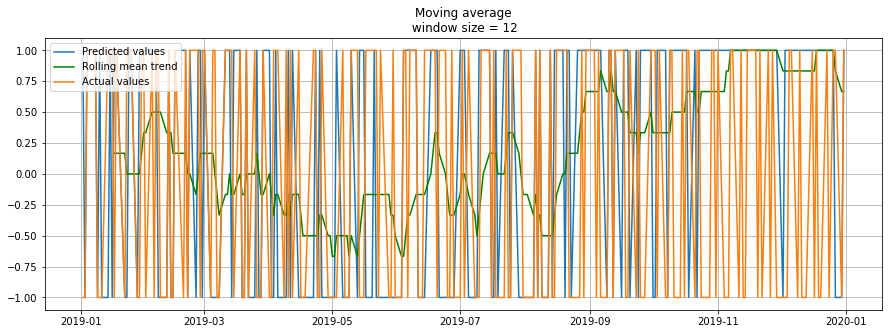

In [232]:
#plotting the same graph with actual values
plt.figure(figsize=(15,5))
plt.title("Moving average\n window size = {}".format(window))

plt.plot(test["DATE"], test["pred"] , label="Predicted values")
plt.plot(test["DATE"], test["Rolling Mean Average"], "g", label="Rolling mean trend")
plt.plot(test["DATE"], y_test , label="Actual values")
plt.legend(loc="upper left")
plt.grid(True)
plt.show()

As we observe here, and in the graph below, the predicted model is firring with the moving average and the actual values and is also capturing the spikes in the model. Hence we can say that the model is well calibrated as it is giving us information about the predicted values.

The reason we see the actual values and the predicted values like this is due our target variable being 'direction'.
However, we can forecast from the graph above and the rolling mean. In the graph without the actual values, we can see that the rolling mean is dipping and steadying a bit, and our predicted value is going up. Hence this is an indication that the prices would fall in the future.
So, I would recommend to sell the stocks, and not buy as the prices would be falling.